<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [20]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35–70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,≥70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35–70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35–70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35–70


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [21]:
boston_df.shape
boston_df.info()
boston_df.describe().T
boston_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.0 KB


Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE_group     0
dtype: int64

# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



## Visualization 1 — Boxplot of MEDV
**What/why:** Shows center, spread, and outliers for Median Value of owner-occupied homes (in \$1000s).


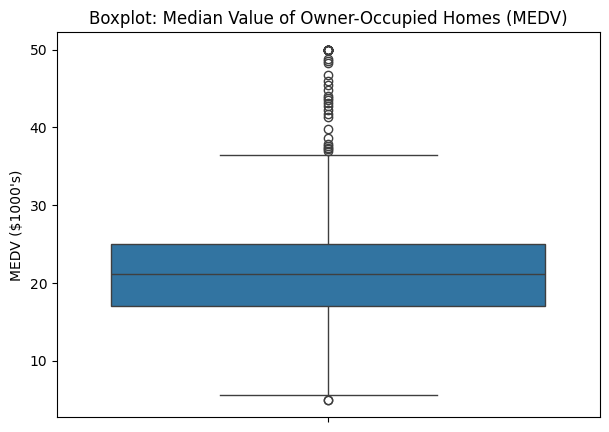

Explanation: The boxplot shows the central tendency and spread of MEDV, with visible upper outliers.


In [8]:
plt.figure(figsize=(7,5))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot: Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000's)")
plt.xlabel("")  # no x-label needed for vertical box
plt.show()

print("Explanation: The boxplot shows the central tendency and spread of MEDV, with visible upper outliers.")


## Visualization 2 — Bar plot of Charles River variable (CHAS)
**What/why:** Counts tracts bounding the Charles River (1) vs not (0).


<ipython-input-9-0605592fe326>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0 = Not near river', '1 = Near river'])


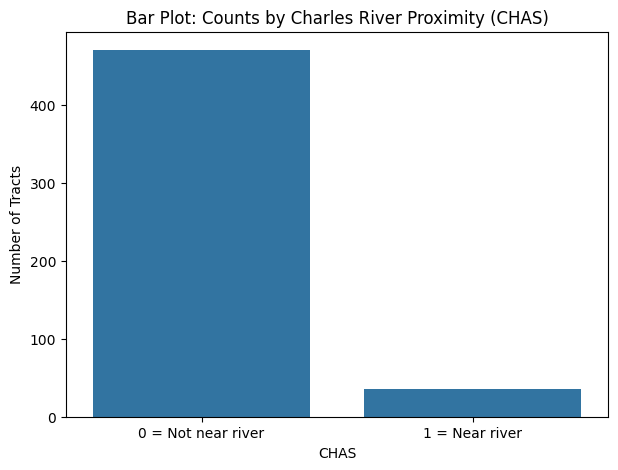

Explanation: Far fewer tracts bound the Charles River (CHAS=1) compared to those that do not (CHAS=0).


In [9]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_xticklabels(['0 = Not near river', '1 = Near river'])
plt.title("Bar Plot: Counts by Charles River Proximity (CHAS)")
plt.xlabel("CHAS")
plt.ylabel("Number of Tracts")
plt.show()

print("Explanation: Far fewer tracts bound the Charles River (CHAS=1) compared to those that do not (CHAS=0).")



## Visualization 3 — Boxplot of MEDV by AGE groups
**What/why:** Compare MEDV across AGE groups (≤35, 35–70, ≥70).


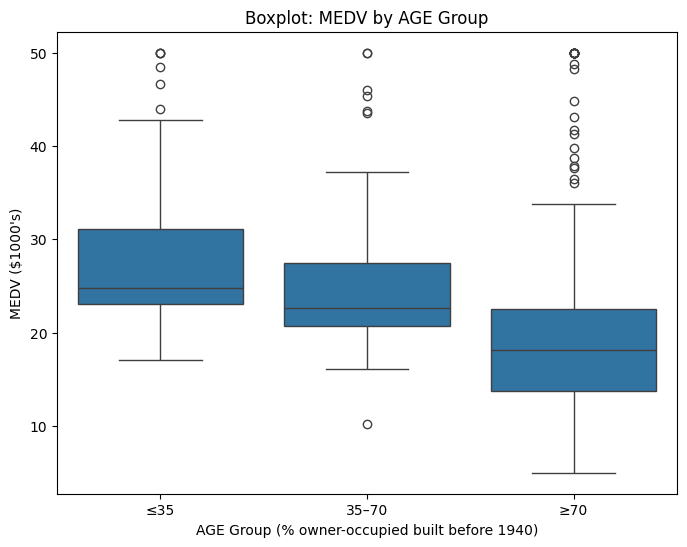

Explanation: Median home values differ by AGE group; the ≤35 group tends to have higher MEDV than older groups.


In [10]:
# Discretize AGE into required groups
bins = [0, 35, 70, 100]
labels = ['≤35', '35–70', '≥70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, order=labels)
plt.title("Boxplot: MEDV by AGE Group")
plt.xlabel("AGE Group (% owner-occupied built before 1940)")
plt.ylabel("MEDV ($1000's)")
plt.show()

print("Explanation: Median home values differ by AGE group; the ≤35 group tends to have higher MEDV than older groups.")


## Visualization 4 — Scatter plot: NOX vs INDUS
**What/why:** Relationship between nitric oxides concentration (NOX) and non-retail business acres (INDUS).


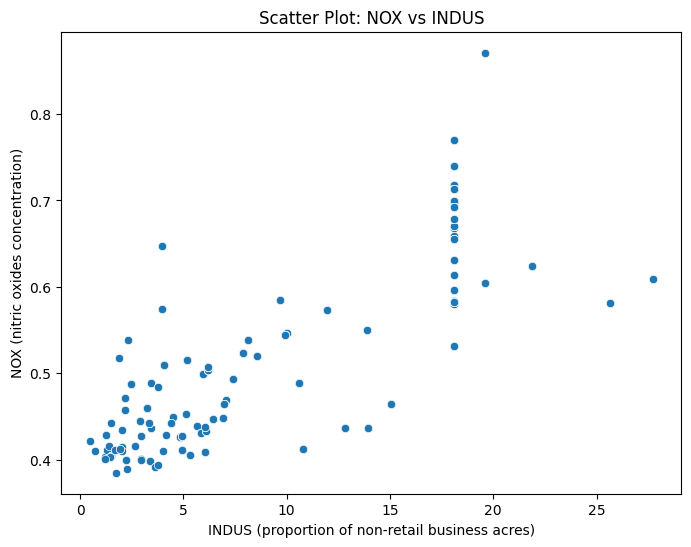

Explanation: NOX increases with INDUS; points show a strong positive association.


In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("INDUS (proportion of non-retail business acres)")
plt.ylabel("NOX (nitric oxides concentration)")
plt.show()

print("Explanation: NOX increases with INDUS; points show a strong positive association.")


## Visualization 5 — Histogram of PTRATIO
**What/why:** Distribution of pupil-teacher ratio across tracts.


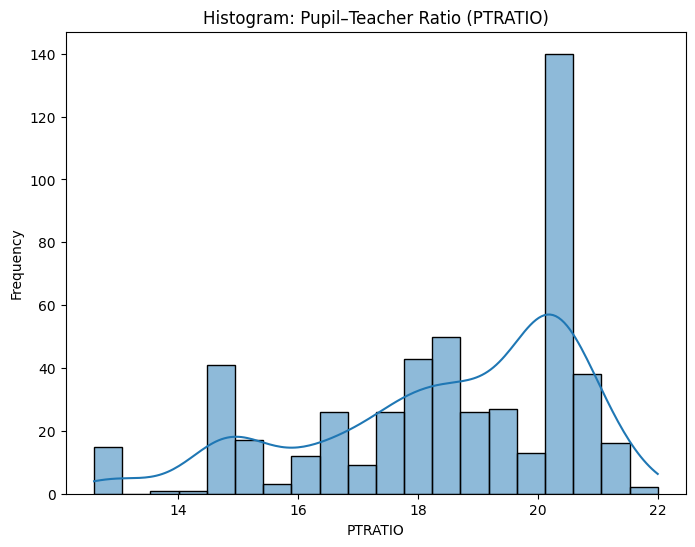

Explanation: PTRATIO clusters around the mid- to high-teens/low-20s with moderate spread.


In [12]:
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title("Histogram: Pupil–Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

print("Explanation: PTRATIO clusters around the mid- to high-teens/low-20s with moderate spread.")



# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.


## Test 1 — T-test (CHAS vs MEDV). Is there a significant difference in median value of houses bounded by the Charles River?

Test: T-test for independent samples

Hypotheses:

H₀: There is no significant difference in MEDV between houses near the river (CHAS=1) and those not near the river (CHAS=0).

H₁: There is a significant difference in MEDV between the two groups.


In [23]:
medv_river    = boston_df.loc[boston_df['CHAS'] == 1, 'MEDV'].dropna()
medv_nonriver = boston_df.loc[boston_df['CHAS'] == 0, 'MEDV'].dropna()

t_stat, p_val = stats.ttest_ind(medv_river, medv_nonriver, equal_var=False)  # Welch's t-test
print(f"Welch t-test: t = {t_stat:.3f}, p = {p_val:.4g}")
print(f"mean(MEDV | CHAS=1) = {medv_river.mean():.2f}")
print(f"mean(MEDV | CHAS=0) = {medv_nonriver.mean():.2f}")

if p_val < 0.05:
    print("Conclusion: Reject H0. There is a significant difference in MEDV between river and non-river tracts.")
else:
    print("Conclusion: Fail to reject H0. No significant difference detected.")
from scipy.stats import ttest_ind



Welch t-test: t = 3.113, p = 0.003567
mean(MEDV | CHAS=1) = 28.44
mean(MEDV | CHAS=0) = 22.09
Conclusion: Reject H0. There is a significant difference in MEDV between river and non-river tracts.
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject H₀: There is a significant difference in MEDV between the two groups.


In [30]:
alpha = 0.05
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_nonriver = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(medv_river, medv_nonriver)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("Reject H₀: There is a significant difference in MEDV between the two groups.")
else:
    print("Fail to reject H₀: No significant difference in MEDV between the two groups.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject H₀: There is a significant difference in MEDV between the two groups.


## Test 2 — ANOVA (MEDV across AGE groups). Is there a difference in Median values of houses (MEDV) for different AGE groups?
**H₀:** μ(≤35) = μ(35–70) = μ(≥70)  
**H₁:** At least one group mean differs.  
α = 0.05

Test: One-way ANOVA

Hypotheses:

H₀: The mean MEDV is the same for all AGE groups.

H₁: At least one group differs in MEDV.


In [28]:
# Using statsmodels ANOVA
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

p = anova_table.loc['C(AGE_group)', 'PR(>F)']
if p < 0.05:
    print("Conclusion: Reject H0. MEDV differs significantly among AGE groups.")
else:
    print("Conclusion: Fail to reject H0. No significant difference among AGE groups.")



,sum_sq,df,F,PR(>F)
C(AGE_group),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


Conclusion: Reject H0. MEDV differs significantly among AGE groups.


In [29]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

p_val_anova = anova_table["PR(>F)"][0]

if p_val_anova < alpha:
    print("Reject H₀: At least one AGE group has a different MEDV.")
else:
    print("Fail to reject H₀: No difference in MEDV among AGE groups.")

                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<ipython-input-29-b5adf3da15b7>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val_anova = anova_table["PR(>F)"][0]


Reject H₀: At least one AGE group has a different MEDV.


## Test 3 — Pearson Correlation (NOX vs INDUS). Is there no relationship between NOX and INDUS?
**H₀:** ρ = 0 (no linear relationship)  
**H₁:** ρ ≠ 0 (linear relationship exists)  
α = 0.05


Test: Pearson correlation

Hypotheses:

H₀: There is no correlation between NOX and INDUS.

H₁: There is a correlation between NOX and INDUS.

In [25]:
corr_coef, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value_corr)

if p_value_corr < alpha:
    print("Reject H₀: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject H₀: No significant correlation between NOX and INDUS.")



Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject H₀: There is a significant correlation between NOX and INDUS.


In [18]:
r, p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson r = {r:.4f}, p = {p:.3e}")

if p < 0.05:
    strength = "strong" if abs(r) >= 0.7 else ("moderate" if abs(r) >= 0.4 else "weak")
    print(f"Conclusion: Reject H0. There is a {strength} positive linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H0. No significant linear relationship detected.")


Pearson r = 0.7637, p = 7.913e-98
Conclusion: Reject H0. There is a strong positive linear relationship between NOX and INDUS.


## Test 4 — Linear Regression (MEDV ~ DIS). What is the impact of an additional weighted distance (DIS) to Boston employment centres on MEDV?
**Question:** Impact of an additional unit of weighted distance to employment centers (DIS) on MEDV.  
**H₀:** β(DIS)=0 (no linear effect)  
**H₁:** β(DIS)≠0 (linear effect exists)  
α = 0.05


Test: Simple Linear Regression

Hypotheses:

H₀: β(DIS) = 0 → DIS has no effect on MEDV.

H₁: β(DIS) ≠ 0 → DIS has an effect on MEDV.

In [19]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
reg = sm.OLS(y, X).fit()
display(reg.summary())

b  = reg.params['DIS']
t  = reg.tvalues['DIS']
p  = reg.pvalues['DIS']
lo, hi = reg.conf_int().loc['DIS']
print(f"\nCoefficient (DIS): {b:.3f}  (95% CI: [{lo:.3f}, {hi:.3f}]), p={p:.3e}")

if p < 0.05:
    print("Conclusion: Reject H0. DIS has a statistically significant positive effect on MEDV.")
else:
    print("Conclusion: Fail to reject H0. No significant effect of DIS on MEDV.")

print("\nInterpretation: For each +1 unit increase in DIS, MEDV increases by "
      f"≈ {b:.2f} (in $1000's). That is, about ${b*1000:,.0f} per unit increase in distance, on average.")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        09:53:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Coefficient (DIS): 1.092  (95% CI: [0.722, 1.462]), p=1.207e-08
Conclusion: Reject H0. DIS has a statistically significant positive effect on MEDV.

Interpretation: For each +1 unit increase in DIS, MEDV increases by ≈ 1.09 (in $1000's). That is, about $1,092 per unit increase in distance, on average.


In [27]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

coef_DIS = model.params['DIS']
p_val_DIS = model.pvalues['DIS']

if p_val_DIS < alpha:
    print(f"Reject H₀: DIS significantly affects MEDV. Each additional unit of DIS increases MEDV by {coef_DIS:.2f} thousand dollars.")
else:
    print("Fail to reject H₀: DIS does not significantly affect MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        10:05:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0